In [ ]:
## STEPS:
# 0. Preprocessor + EDA + Feature Selection
# 1. Extract input and output column
# 2. Scale the value
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/ model selection
#6. Deploy the model

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/placement.csv')

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [ ]:
df.shape

(100, 3)

In [ ]:
df = df.iloc[:,1:]

In [ ]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
import matplotlib.pyplot as plt

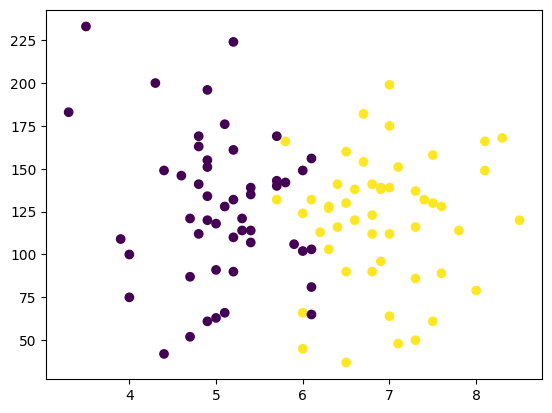

In [ ]:
plt.scatter(df['cgpa'],df['iq'], c=df['placement'])

In [ ]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [ ]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [ ]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [ ]:
y.shape

(100,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [ ]:
X_train

,cgpa,iq
12,5.4,139.0
72,7.3,116.0
8,6.1,156.0
78,6.1,81.0
42,7.6,89.0
...,...,...
51,4.8,141.0
56,6.1,65.0
24,4.7,121.0
64,7.0,64.0


In [ ]:
y_train

,placement
12,0
72,1
8,0
78,0
42,1
...,...
51,0
56,0
24,0
64,1


In [ ]:
X_test

,cgpa,iq
74,6.7,154.0
28,5.2,90.0
43,6.8,141.0
81,5.4,107.0
50,3.5,233.0
65,8.1,166.0
85,5.8,166.0
16,5.2,224.0
18,4.0,100.0
83,7.5,130.0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_train

array([[-0.55236616,  0.48952178],
       [ 1.1681186 , -0.11980479],
       [ 0.08149665,  0.93989358],
       [ 0.08149665, -1.04704086],
       [ 1.43977408, -0.83510119],
       [-1.45788445, -2.08024677],
       [ 0.44370396, -0.80860873],
       [-0.28071067,  0.30407456],
       [-0.28071067,  0.59549161],
       [-0.91457347, -0.78211627],
       [-0.09960701, -0.38472938],
       [-0.00905518, -1.44442775],
       [ 0.2626003 ,  0.19810472],
       [-0.82402164,  0.19810472],
       [ 1.1681186 ,  0.43653686],
       [-0.91457347, -1.52390513],
       [ 1.1681186 , -1.8683071 ],
       [-1.0051253 ,  0.91340112],
       [ 1.8019814 , -1.10002578],
       [ 0.53425579,  0.46302932],
       [ 1.43977408,  0.19810472],
       [-0.00905518,  0.09213489],
       [-0.28071067,  0.51601423],
       [ 0.2626003 ,  0.17161226],
       [-1.91064359, -0.305252  ],
       [ 2.25474054, -0.01383495],
       [-0.55236616,  0.38355194],
       [-0.64291799, -0.17278971],
       [-1.09567713,

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
X_test

array([[ 0.62480762,  0.88690866],
       [-0.73346982, -0.80860873],
       [ 0.71535945,  0.54250669],
       [-0.55236616, -0.35823692],
       [-2.27285091,  2.97981295],
       [ 1.89253323,  1.20481818],
       [-0.19015884,  1.20481818],
       [-0.73346982,  2.74138081],
       [-1.82009176, -0.54368414],
       [ 1.34922225,  0.25108964]])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()

In [ ]:
#Model Training
clf.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
y_test

,placement
74,1
28,0
43,1
81,0
50,0
65,1
85,1
16,0
18,0
83,1


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

0.9

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

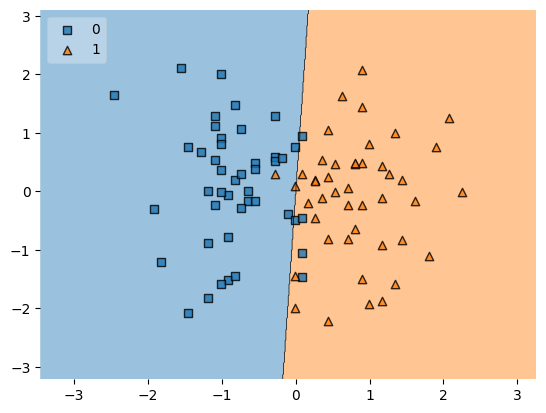

In [ ]:
plot_decision_regions(X_train, y_train.values, clf=clf , legend=2)

In [ ]:
import pickle

In [ ]:
pickle.dump(clf, open('model.pkl', 'wb'))